# Introduction



# Data Gathering



```
# This is formatted as code
```

* In our data-gathering process, we used Kaggle, a collaborative and competition website for those interested in data science and machine learning. Kaggle is a platform for data scientists to work together to solve problems, share and publish datasets, use notebooks with GPU support, and participate in events. We finally chose the Students' Academic Performance Dataset after further browsing multiple datasets in the platform.

# Data Cleansing

Before we start with all of the analysis part, we should first cleanse our dataset to make it easier to work with. We will be using the `pandas` library to do this as well as numpy and matplotlib for visualization.

First we'll import the libraries

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

After which, we'll read the dataset from our csv file into a variable name `df`

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('xAPI-Edu-Data.csv')
df

Saving xAPI-Edu-Data.csv to xAPI-Edu-Data.csv


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


Having known of the data and our questions we want to answer, we can now start with the data cleansing process.

First we'll drop those that are unimportant to our analysis as this would not help us in our analysis to answer our questions.

In [ ]:
columnDrop = {
    'gender',
    'NationalITy',
    'PlaceofBirth',
    'StageID',
    'GradeID',
    'SectionID',
    'Topic',
    'Semester',
}
df.drop(columnDrop, axis=1, inplace=True)

Now let's check our data if everything is working fine

In [ ]:
df

,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,Father,15,16,2,20,Yes,Good,Under-7,M
1,Father,20,20,3,25,Yes,Good,Under-7,M
2,Father,10,7,0,30,No,Bad,Above-7,L
3,Father,30,25,5,35,No,Bad,Above-7,L
4,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...
475,Father,5,4,5,8,No,Bad,Above-7,L
476,Father,50,77,14,28,No,Bad,Under-7,M
477,Father,55,74,25,29,No,Bad,Under-7,M
478,Father,30,17,14,57,No,Bad,Above-7,L


Since the dropping of columns are successful, now let's drop all the NaN values in our dataset

In [ ]:
df = df.dropna()

Now let's check if there is any NaN values left in our dataset

In [ ]:
df[df.isna().any(axis=1)]

,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class


To make it easier for us to understand, we'll change the 'class' column name to 'mark'

In [ ]:
df['Mark'] = df['Class']
df.drop('Class', axis=1, inplace=True)
df

,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Mark
0,Father,15,16,2,20,Yes,Good,Under-7,M
1,Father,20,20,3,25,Yes,Good,Under-7,M
2,Father,10,7,0,30,No,Bad,Above-7,L
3,Father,30,25,5,35,No,Bad,Above-7,L
4,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...
475,Father,5,4,5,8,No,Bad,Above-7,L
476,Father,50,77,14,28,No,Bad,Under-7,M
477,Father,55,74,25,29,No,Bad,Under-7,M
478,Father,30,17,14,57,No,Bad,Above-7,L


Now let's try to re-express the data in quantitative form to make it easier to work with. Here's the functions that we're going to use to re-express the data. But first let's see what are the unique values in each categorical columns.

In [ ]:
df

,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Mark
0,Father,15,16,2,20,Yes,Good,Under-7,M
1,Father,20,20,3,25,Yes,Good,Under-7,M
2,Father,10,7,0,30,No,Bad,Above-7,L
3,Father,30,25,5,35,No,Bad,Above-7,L
4,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...
475,Father,5,4,5,8,No,Bad,Above-7,L
476,Father,50,77,14,28,No,Bad,Under-7,M
477,Father,55,74,25,29,No,Bad,Under-7,M
478,Father,30,17,14,57,No,Bad,Above-7,L


In [ ]:
print(df['Mark'].unique())
print(df['ParentAnsweringSurvey'].unique())
print(df['ParentschoolSatisfaction'].unique())
print(df['StudentAbsenceDays'].unique())
print(df['Relation'].unique())


['M' 'L' 'H']
['Yes' 'No']
['Good' 'Bad']
['Under-7' 'Above-7']
['Father' 'Mum']


In [ ]:
def parentAnsweredSurvey(x):
    if x == 'Yes':
        return 1
    else:
        return 0

def parentSchoolSatisfaction(x):
    if x == 'Good':
        return 1
    return 0

def studentAbsenceDays(x):
    if x == 'Under-7':
        return 1
    return 0

def relation(x):
    if x == 'Father':
        return 1
    return 0

def mark(x):
    if x == 'L':
        return 1
    elif x == 'M':
        return 2
    return 3



Now that we have the functions, it's time to apply them in our dataset

In [ ]:
df['ParentAnsweringSurvey'] = df['ParentAnsweringSurvey'].apply(parentAnsweredSurvey)
df['ParentschoolSatisfaction'] = df['ParentschoolSatisfaction'].apply(parentSchoolSatisfaction)
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].apply(studentAbsenceDays)
df['Relation'] = df['Relation'].apply(relation)
df['Mark'] = df['Mark'].apply(mark)

# Print the Result
df

,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Mark
0,1,15,16,2,20,1,1,1,2
1,1,20,20,3,25,1,1,1,2
2,1,10,7,0,30,0,0,0,1
3,1,30,25,5,35,0,0,0,1
4,1,40,50,12,50,0,0,0,2
...,...,...,...,...,...,...,...,...,...
475,1,5,4,5,8,0,0,0,1
476,1,50,77,14,28,0,0,1,2
477,1,55,74,25,29,0,0,1,2
478,1,30,17,14,57,0,0,0,1


To make sure that everything is correct, we'll print out each unique values of each categorical columns

In [ ]:
print(df['Mark'].unique())
print(df['ParentAnsweringSurvey'].unique())
print(df['ParentschoolSatisfaction'].unique())
print(df['StudentAbsenceDays'].unique())
print(df['Relation'].unique())


[2 1 3]
[1 0]
[1 0]
[1 0]
[1 0]


Now that everything is prepared, it's time to create a copy of our cleaned dataset

In [ ]:
df_clean = df.copy()

Since everything looks good, we'll now proceed to the next step

# Exploratory Data Analysis

Now that the data is cleansed, let's try to find abnormalities in our data.

In [ ]:
df_explore = df_clean.copy()
df_explore

,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Mark
0,1,15,16,2,20,1,1,1,2
1,1,20,20,3,25,1,1,1,2
2,1,10,7,0,30,0,0,0,1
3,1,30,25,5,35,0,0,0,1
4,1,40,50,12,50,0,0,0,2
...,...,...,...,...,...,...,...,...,...
475,1,5,4,5,8,0,0,0,1
476,1,50,77,14,28,0,0,1,2
477,1,55,74,25,29,0,0,1,2
478,1,30,17,14,57,0,0,0,1


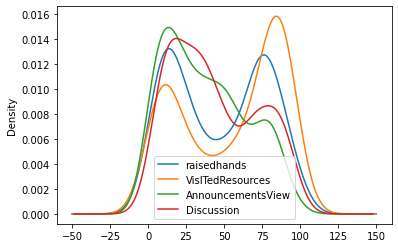

In [ ]:
df_explore[['raisedhands','VisITedResources','AnnouncementsView','Discussion']].plot.kde()

Looking at the data above, we can see that the graph are more of a binomial distribution. Let's create a boxplot to find outliers in our data.

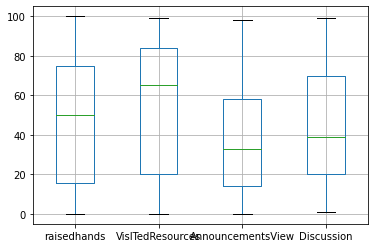

In [ ]:
df_explore.boxplot(['raisedhands','VisITedResources','AnnouncementsView','Discussion'])

Looking at the data, there seem to have no outliers, so we'll proceed to the next step

First let's see the distribution of our data

In [ ]:
df_explore.describe()

,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Mark
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.589583,46.775000,54.797917,37.918750,43.283333,0.562500,0.608333,0.602083,2.031250
std,0.492423,30.779223,33.080007,26.611244,27.637735,0.496596,0.488632,0.489979,0.748738
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,15.750000,20.000000,14.000000,20.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,50.000000,65.000000,33.000000,39.000000,1.000000,1.000000,1.000000,2.000000
75%,1.000000,75.000000,84.000000,58.000000,70.000000,1.000000,1.000000,1.000000,3.000000
max,1.000000,100.000000,99.000000,98.000000,99.000000,1.000000,1.000000,1.000000,3.000000


For now, we don't see any abnormalities as after cleansing information the count of each columns are equal to each other. We can also see some trends in here especially for the min and the max value of each columns. Now let's validate the data by checking if there are any outliers in our data.

In [ ]:
df_explore.isnull().sum()

Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Mark                        0
dtype: int64

Though we already validated this on the data cleansing part, we'll still check it again to make sure that everything is correct. And as the above data shows, there are no more NaN or Null values in the data. So now we'll take a look if every data type of each data is correct.

In [ ]:
df_explore.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Relation                  480 non-null    int64
 1   raisedhands               480 non-null    int64
 2   VisITedResources          480 non-null    int64
 3   AnnouncementsView         480 non-null    int64
 4   Discussion                480 non-null    int64
 5   ParentAnsweringSurvey     480 non-null    int64
 6   ParentschoolSatisfaction  480 non-null    int64
 7   StudentAbsenceDays        480 non-null    int64
 8   Mark                      480 non-null    int64
dtypes: int64(9)
memory usage: 37.5 KB


Looking at the Data Types, everything is working well base on our data cleansing part. Having this, let's try to ask some questions and try to answer them.

First we want to check whether higher or lower absences take a toll on their academic performance. We'll set-up the data in such way that it would be easier for us to analyze our data set into. Since we know that:        
1 - Under-7   
0 - Above-7   
Absences, we can try to see if it has a correlation with the academic performance of students using point biseral correlation

In [ ]:
df_pb = df_clean[['StudentAbsenceDays','Mark']]
df_pb

,StudentAbsenceDays,Mark
0,1,2
1,1,2
2,0,1
3,0,1
4,0,2
...,...,...
475,0,1
476,1,2
477,1,2
478,0,1


In [ ]:
df_pb_cpy = df_pb.groupby('StudentAbsenceDays').count().unstack()
df_pb_cpy


      StudentAbsenceDays
Mark  0                     191
      1                     289
dtype: int64

Having this information, we can use chi-square test and get the Crammer's V to understand if there's an association between two variables

Reference: https://www.statology.org/cramers-v-in-python/

In [ ]:

import scipy.stats as stats

a = np.matrix('116 71 4; 11 140 138')

X2 = stats.chi2_contingency(a, correction=False)[0]
n = np.sum(a)
minDim = min(a.shape)-1

V = np.sqrt((X2/n) / minDim)
V

0.6849647489543028

In here we show that there is a strong association between the students' absences and their academic performance which proves our hypothesis

### Is there an existing correlation between the participation of students and the amount of visited resources and their interactions during class discussions?

In [ ]:
from sklearn.model_selection import train_test_split

df_new = df_clean[['raisedhands','Discussion','VisITedResources']]
x_train, x_test, y_train, y_test = train_test_split(df_new[['raisedhands','Discussion']], df_new['VisITedResources'], test_size=0.2, random_state=0)
df_new

,raisedhands,Discussion,VisITedResources
0,15,20,16
1,20,25,20
2,10,30,7
3,30,35,25
4,40,50,50
...,...,...,...
475,5,8,4
476,50,28,77
477,55,29,74
478,30,57,17


In [ ]:
from sklearn import linear_model

regression = linear_model.LinearRegression()
regression.fit(x_train,y_train)
regression.score(x_train,y_train)

0.48793865808824743

as you see at the regression score, it shows a medium correlation between the X and y variables.

To have a better understanding, let's plot it

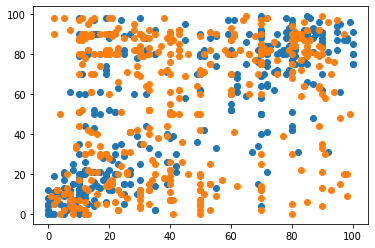

In [ ]:

plt.scatter(x_train['raisedhands'], y_train)
plt.scatter(x_train['Discussion'], y_train)
plt.show()

With this, we can see, even though the data is scattered in such way that we can't really see the regression line, base on the calculation, there is a positive medium correlation between the variables. In here, one might say that we should clean the data further and check for outliers in the data. Anyway, now that we have a glimpse and a better understanding of the data, it's now time to create a model that would predict the academic performance of the students.

# Data Modelling

Having an understanding of the data, we can now start with the data modelling part. First we'll create a copy of our cleaned dataset then we'll select the features that we'll use for our model

In [ ]:
df_clean

,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Mark
0,1,15,16,2,20,1,1,1,2
1,1,20,20,3,25,1,1,1,2
2,1,10,7,0,30,0,0,0,1
3,1,30,25,5,35,0,0,0,1
4,1,40,50,12,50,0,0,0,2
...,...,...,...,...,...,...,...,...,...
475,1,5,4,5,8,0,0,0,1
476,1,50,77,14,28,0,0,1,2
477,1,55,74,25,29,0,0,1,2
478,1,30,17,14,57,0,0,0,1


In [ ]:
df_pre = df_clean[['raisedhands','Discussion','VisITedResources', 'Mark']]
df_pre

,raisedhands,Discussion,VisITedResources,Mark
0,15,20,16,2
1,20,25,20,2
2,10,30,7,1
3,30,35,25,1
4,40,50,50,2
...,...,...,...,...
475,5,8,4,1
476,50,28,77,2
477,55,29,74,2
478,30,57,17,1


With this, it's time to split the data into training and testing data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_pre[['raisedhands','Discussion','VisITedResources']], df_pre['Mark'], test_size=0.2, random_state=0)

Now we'll use linear regression as our model

In [ ]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x_train, y_train)
regression.score(x_train, y_train)

0.527970753248922

Having now the regression score, it's time to scatter the data for us to understand how everything work together

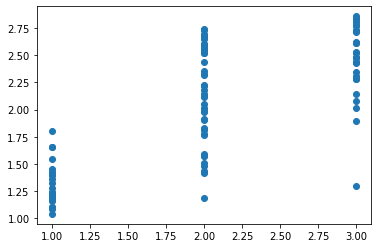

In [ ]:
plt.scatter(y_test,regression.predict(x_test))

In [ ]:
stats.pointbiserialr(y_test, regression.predict(x_test))[0]

0.7245128272342103

On the above graph, we see a strong correlation between the X and y variables saying that as a person participate by discussion, raising hands, and continue visit for resources, it will have a positive impact on their academic performance.

Having use of linear regression, let's try to use other model to see if we can get a better score. We'll use the Random Forest Regressor as our model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
regr.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

0.5432085466785987


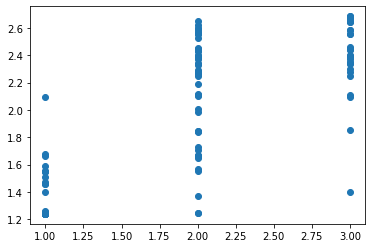

In [ ]:
print(regr.score(x_train, y_train))
plt.scatter(y_test,regr.predict(x_test))

In [ ]:
stats.pointbiserialr(y_test, regr.predict(x_test))[0]

0.7111534686271549

Now let's see the accuracy of both models

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print("Accuracy: ", r2_score(y_test, regr.predict(x_test)))
print("Accuracy: ", r2_score(y_test, regression.predict(x_test)))

Accuracy:  0.5040365897453035
Accuracy:  0.5218843732047478


Looking at both the accuracy, even though it's not that big of a difference, we can see that the Linear Regression model has a better accuracy than the Random Forest Regressor. With this, we can conclude that the Linear Regression model is better than the Random Forest Regressor for this DataSet.

# Evaluation (Interpreting Results)

On the above graph, we see a strong correlation between the X and y variables saying that as a person participate by discussion, raising hands, and continue visit for resources, it will have a positive impact on their academic performance. We shown it by using point-biserial correlation test. With this, we can conclude that the more a student participate in class, the more they will have a positive impact on their academic performance. This participation includes:
- Discussion
- Raising Hands
- Going for Resources

## Recommendation

Since the data isn't normally distributed, the accuracy of the model is not that high. To improve the accuracy, it would be better to either explore the data better or get more data to train the model. We could also try to use other models to see if we can get a better accuracy.

In [ ]:
# ['raisedhands','Discussion','VisITedResources']

regression.predict([[0, 0, 1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.01340332])